# Assignment 4

## Imports

In [21]:
from collections import defaultdict, deque
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.colors as mcolors

## Helper Functions

Helper functions for plotting gantt charts and conversions

In [22]:
def convert_time_to_minutes(time_str):
    return (
        datetime.strptime(time_str, "%I:%M%p") - datetime.strptime("12:00AM", "%I:%M%p")
    ).total_seconds() / 60


def convert_minutes_to_time(minutes):
    return (
        datetime.strptime("12:00AM", "%I:%M%p") + timedelta(minutes=minutes)
    ).strftime("%I:%M")


def print_gantt_chart(gantt_chart):
    print("Gantt Chart:")
    for pid, arrival_time, completion_time, processor in gantt_chart:
        print(
            "PID {0}: {1} - {2} on Processor {3}".format(
                pid,
                convert_minutes_to_time(arrival_time),
                convert_minutes_to_time(completion_time),
                processor,
            )
        )


def plot_gantt_chart(gantt_chart, title="Gantt Chart"):
    _, ax = plt.subplots(figsize=(10, 5))
    yticks = []
    y_labels = []
    x_ticks = []
    x_labels = []

    # Define a color map for process IDs
    colors = list(mcolors.TABLEAU_COLORS.values())
    color_map = {
        pid: colors[i % len(colors)]
        for i, pid in enumerate(set(pid for pid, _, _, _ in gantt_chart))
    }

    # Group gantt_chart entries by processor ID
    processor_dict = defaultdict(list)
    for pid, start, end, processor_id in gantt_chart:
        processor_dict[processor_id].append((pid, start, end))

    for i, (processor_id, intervals) in enumerate(processor_dict.items()):
        for pid, start, end in intervals:
            ax.barh(
                y=i,
                width=end - start,
                left=start,
                height=0.4,
                align="center",
                color=color_map[pid],
                edgecolor="black",
            )
            ax.text(
                (start + end) / 2,
                i,
                f"P{pid}",
                va="center",
                ha="center",
                color="white",
                fontsize=12,
                fontweight="bold",
            )
            x_ticks.extend([start, end])
            x_labels.extend(
                [convert_minutes_to_time(start), convert_minutes_to_time(end)]
            )
        yticks.append(i)
        y_labels.append(f"Processor {processor_id}")

    ax.set_xlabel("Time (HH:MM)")
    ax.set_xticks(sorted(set(x_ticks)))
    ax.set_xticklabels(sorted(set(x_labels)), rotation=45, ha="right")
    ax.set_yticks(yticks)
    ax.set_yticklabels(y_labels)
    ax.set_title(title)
    ax.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

## Processes

| Process ID | Arrival Time | Estimated processing time |
| ---------- | ------------ | ------------------------- |
| P1 | 5:30 PM | 5 unit time |
| P2 | 5:33 PM | 1 unit time |
| P3 | 5:40 PM | 11 unit time |
| P4 | 5:42 PM | 5 unit time |
| P5 | 5:45 PM | 12 unit time |

below is the list of processes:

In [23]:
# Input: List of tuples (Process ID, Arrival Time in HH:MM AM/PM, Burst Time in minutes)
processes = [
    (1, "5:30PM", 5),
    (2, "5:33PM", 1),
    (3, "5:40PM", 11),
    (4, "5:42PM", 5),
    (5, "5:45PM", 12),
]

## Q1: Multiprogramming System (FCFS)

Gantt Chart:
PID 1: 05:30 - 05:35 on Processor 0
PID 2: 05:35 - 05:36 on Processor 0
PID 3: 05:40 - 05:51 on Processor 0
PID 4: 05:51 - 05:56 on Processor 0
PID 5: 05:56 - 06:08 on Processor 0


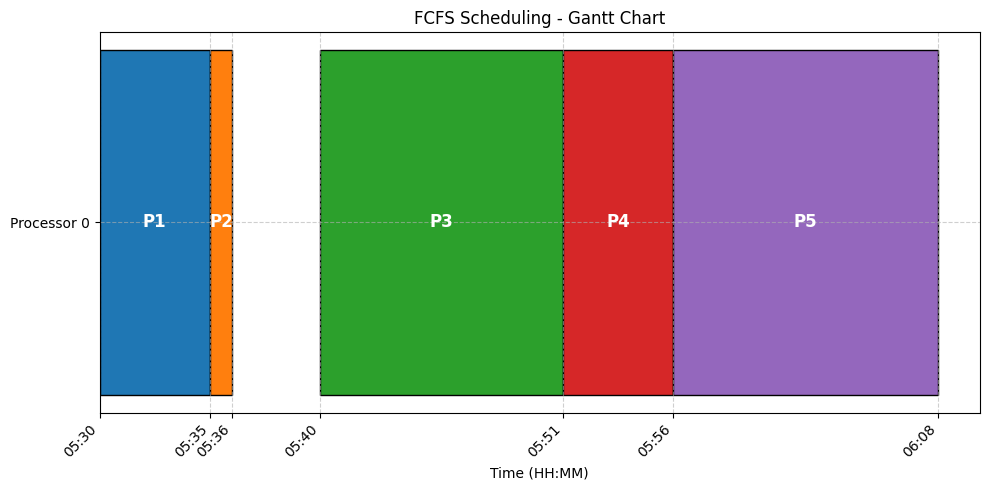

In [24]:
def fcfs_scheduling(processes,):
    processes.sort(key=lambda x: x[1])  # Sort by arrival time
    start_time = 0
    gantt_chart = []

    for process in processes:
        pid, arrival, burst = process
        arrival = convert_time_to_minutes(arrival)
        if start_time < arrival:
            start_time = arrival  # CPU idle time handling

        gantt_chart.append(
            (pid, start_time, start_time + burst, 0)
        )  # Processor ID is 0
        start_time += burst

    return gantt_chart
 

gantt_chart = fcfs_scheduling(processes)
print_gantt_chart(gantt_chart)
plot_gantt_chart(gantt_chart, title="FCFS Scheduling - Gantt Chart")

## Q2: Multiprogramming with priority for shortest job first in non pre-emptive mode (SJF)

Gantt Chart:
PID 1: 05:30 - 05:35 on Processor 0
PID 2: 05:35 - 05:36 on Processor 0
PID 3: 05:40 - 05:51 on Processor 0
PID 4: 05:51 - 05:56 on Processor 0
PID 5: 05:56 - 06:08 on Processor 0


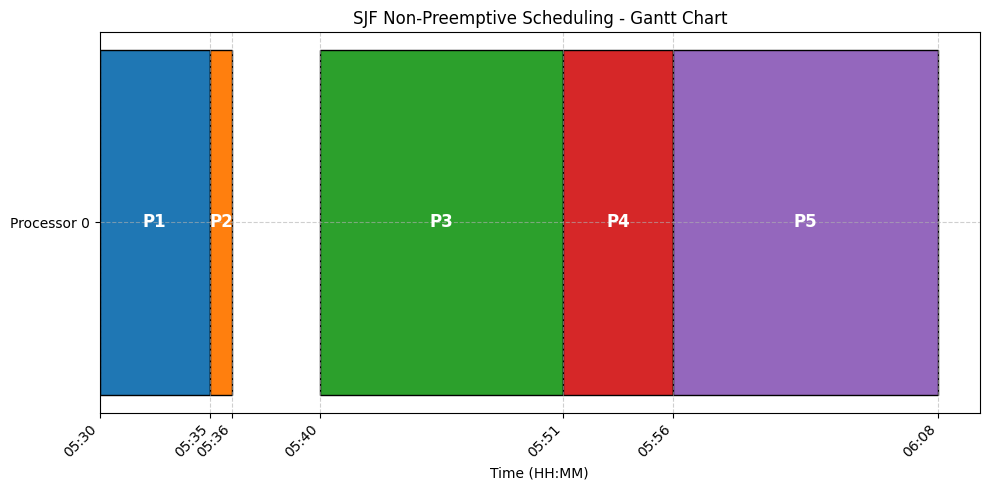

In [25]:
def sjf_non_preemptive_scheduling(processes):
    processes = [
        (pid, convert_time_to_minutes(arrival), burst)
        for pid, arrival, burst in processes
    ]
    processes.sort(key=lambda x: (x[1], x[2]))  # Sort by arrival time, then burst time

    start_time = 0
    gantt_chart = []
    remaining_processes = processes[:]

    while remaining_processes:
        available_processes = [p for p in remaining_processes if p[1] <= start_time]
        if available_processes:
            shortest_job = min(available_processes, key=lambda x: x[2])
        else:
            shortest_job = min(remaining_processes, key=lambda x: x[1])
            start_time = shortest_job[1]

        remaining_processes.remove(shortest_job)
        pid, _, burst = shortest_job
        gantt_chart.append(
            (pid, start_time, start_time + burst, 0)
        )  # Processor ID is 0
        start_time += burst

    return gantt_chart


gantt_chart = sjf_non_preemptive_scheduling(processes)
print_gantt_chart(gantt_chart)
plot_gantt_chart(gantt_chart, title="SJF Non-Preemptive Scheduling - Gantt Chart")

## Q3: Multiprogramming with priority for shortest job first in pre-emptive mode (SRTF)

Gantt Chart:
PID 1: 05:30 - 05:33 on Processor 0
PID 2: 05:33 - 05:34 on Processor 0
PID 1: 05:34 - 05:36 on Processor 0
PID 3: 05:40 - 05:42 on Processor 0
PID 4: 05:42 - 05:47 on Processor 0
PID 3: 05:47 - 05:56 on Processor 0
PID 5: 05:56 - 06:08 on Processor 0


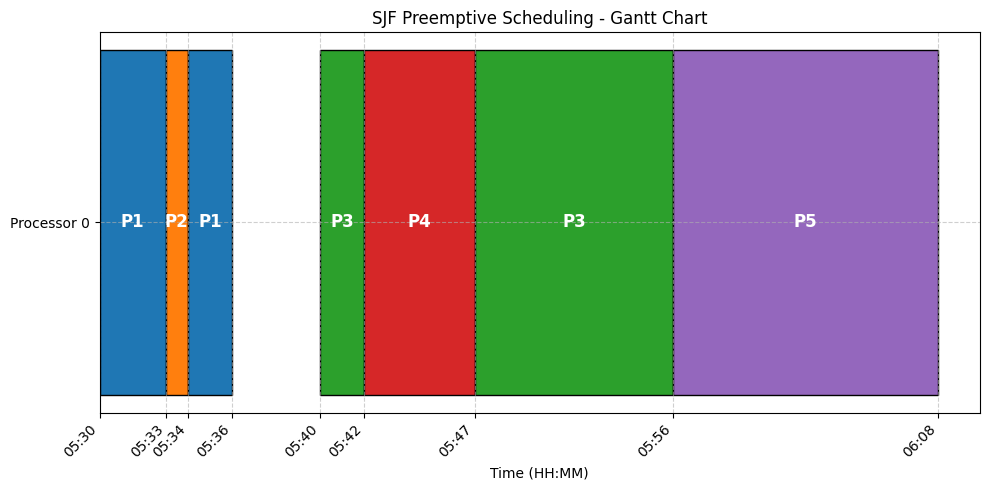

In [26]:
def sjf_preemptive_scheduling(processes):
    processes = [
        (pid, convert_time_to_minutes(arrival), burst)
        for pid, arrival, burst in processes
    ]
    processes.sort(key=lambda x: x[1])  # Sort by arrival time

    time = 0
    remaining_processes = [
        list(p) for p in processes
    ]  # Convert tuples to lists for modification
    gantt_chart = []
    last_pid = None

    while remaining_processes:
        available_processes = [
            p for p in remaining_processes if p[1] <= time and p[2] > 0
        ]

        if available_processes:
            shortest_job = min(available_processes, key=lambda x: x[2])
            pid, _, _ = shortest_job

            if last_pid != pid:
                gantt_chart.append((pid, time, time + 1, 0))  # Processor ID is 0
            else:
                gantt_chart[-1] = (
                    pid,
                    gantt_chart[-1][1],
                    time + 1,
                    0,
                )  # Processor ID is 0

            shortest_job[2] -= 1  # Decrease burst time by 1 unit
            last_pid = pid

            if shortest_job[2] == 0:
                remaining_processes.remove(shortest_job)
        else:
            last_pid = None  # CPU idle period

        time += 1

    return gantt_chart


gantt_chart = sjf_preemptive_scheduling(processes)
print_gantt_chart(gantt_chart)
plot_gantt_chart(gantt_chart, title="SJF Preemptive Scheduling - Gantt Chart")

## Q4: Time sharing system (RR) with time slice of 2 unit time

Gantt Chart:
PID 1: 05:30 - 05:34 on Processor 0
PID 2: 05:34 - 05:35 on Processor 0
PID 1: 05:35 - 05:36 on Processor 0
PID 3: 05:40 - 05:42 on Processor 0
PID 4: 05:42 - 05:44 on Processor 0
PID 3: 05:44 - 05:46 on Processor 0
PID 4: 05:46 - 05:48 on Processor 0
PID 5: 05:48 - 05:50 on Processor 0
PID 3: 05:50 - 05:52 on Processor 0
PID 4: 05:52 - 05:53 on Processor 0
PID 5: 05:53 - 05:55 on Processor 0
PID 3: 05:55 - 05:57 on Processor 0
PID 5: 05:57 - 05:59 on Processor 0
PID 3: 05:59 - 06:01 on Processor 0
PID 5: 06:01 - 06:03 on Processor 0
PID 3: 06:03 - 06:04 on Processor 0
PID 5: 06:04 - 06:08 on Processor 0


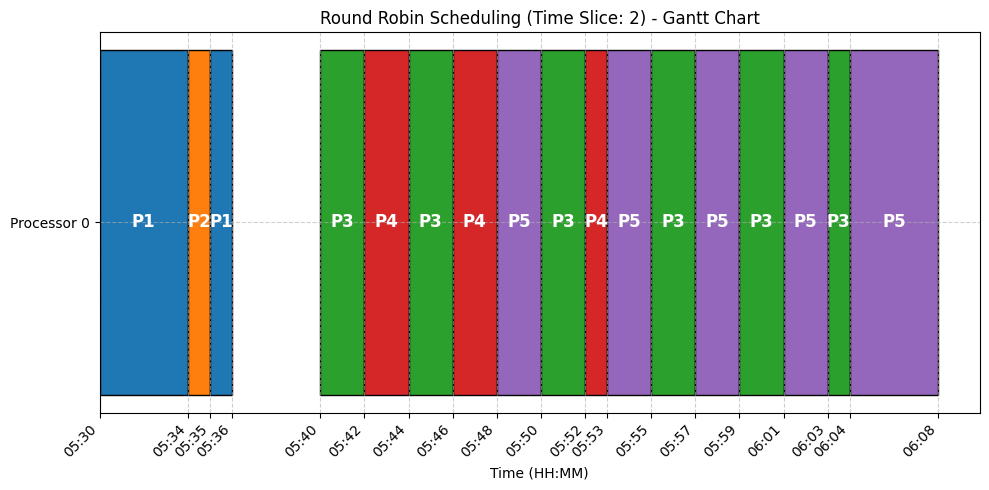

In [27]:
def round_robin_scheduling(processes, time_slice):
    processes = deque(
        sorted(
            (
                [pid, convert_time_to_minutes(arrival), burst, burst]
                for pid, arrival, burst in processes
            ),
            key=lambda x: x[1],
        )
    )  # Sort by arrival time

    time = 0
    queue = deque()
    gantt_chart = []
    last_pid = None

    while processes or queue:
        while processes and processes[0][1] <= time:
            queue.append(processes.popleft())

        if queue:
            process = queue.popleft()
            pid, _, remaining_burst, _ = process
            execute_time = min(time_slice, remaining_burst)

            if last_pid != pid:
                gantt_chart.append(
                    (pid, time, time + execute_time, 0)
                )  # Processor ID is 0
            else:
                gantt_chart[-1] = (
                    pid,
                    gantt_chart[-1][1],
                    time + execute_time,
                    0,
                )  # Processor ID is 0

            process[2] -= execute_time  # Reduce remaining burst time
            time += execute_time

            while processes and processes[0][1] <= time:
                queue.append(processes.popleft())

            if process[2] > 0:
                queue.append(process)  # Reinsert if still needs execution
            last_pid = pid
        else:
            time += 1  # CPU idle time
            last_pid = None

    return gantt_chart


time_slice = 2
gantt_chart = round_robin_scheduling(processes, time_slice)
print_gantt_chart(gantt_chart)
plot_gantt_chart(
    gantt_chart,
    title=f"Round Robin Scheduling (Time Slice: {time_slice}) - Gantt Chart",
)

## Q5: Multiprocessing system (FCFS) with 3 processors

Gantt Chart:
PID 1: 05:30 - 05:35 on Processor 0
PID 2: 05:33 - 05:34 on Processor 1
PID 3: 05:40 - 05:51 on Processor 2
PID 4: 05:42 - 05:47 on Processor 1
PID 5: 05:45 - 05:57 on Processor 0


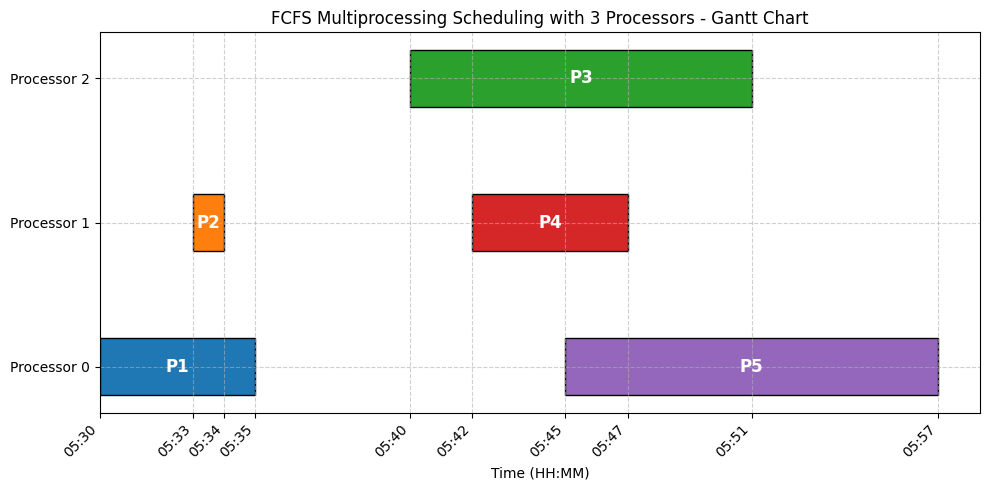

In [ ]:
def fcfs_multiprocessing_scheduling(processes, num_processors):
    processes = [
        (pid, convert_time_to_minutes(arrival), burst)
        for pid, arrival, burst in processes
    ]
    processes.sort(key=lambda x: x[1])  # Sort by arrival time

    start_times = [0] * num_processors  # Track start time for each processor
    gantt_chart = []

    for process in processes:
        pid, arrival, burst = process

        # Find the processor that will be free the earliest
        earliest_processor = min(range(num_processors), key=lambda x: start_times[x])

        if start_times[earliest_processor] < arrival:
            start_times[earliest_processor] = arrival  # CPU idle time handling

        gantt_chart.append(
            (
                pid,
                start_times[earliest_processor],
                start_times[earliest_processor] + burst,
                earliest_processor,
            )
        )
        start_times[earliest_processor] += burst

    return gantt_chart


num_processors = 3
gantt_chart = fcfs_multiprocessing_scheduling(processes, num_processors)
print_gantt_chart(gantt_chart)
plot_gantt_chart(
    gantt_chart,
    title=f"FCFS Multiprocessing Scheduling with {num_processors} Processors - Gantt Chart",
)

## Q6: Multiprocessing time sharing system (RR) with two processors and time slice of 2 unit time

Gantt Chart:
PID 1: 05:30 - 05:32 on Processor 0
PID 1: 05:32 - 05:34 on Processor 0
PID 2: 05:33 - 05:34 on Processor 1
PID 1: 05:34 - 05:35 on Processor 0
PID 3: 05:40 - 05:42 on Processor 0
PID 4: 05:42 - 05:44 on Processor 0
PID 3: 05:42 - 05:44 on Processor 1
PID 4: 05:44 - 05:46 on Processor 0
PID 3: 05:44 - 05:46 on Processor 1
PID 4: 05:46 - 05:47 on Processor 1
PID 5: 05:46 - 05:48 on Processor 0
PID 3: 05:47 - 05:49 on Processor 1
PID 5: 05:48 - 05:50 on Processor 0
PID 3: 05:49 - 05:51 on Processor 1
PID 5: 05:50 - 05:52 on Processor 0
PID 3: 05:51 - 05:52 on Processor 1
PID 5: 05:52 - 05:54 on Processor 0
PID 5: 05:54 - 05:56 on Processor 0
PID 5: 05:56 - 05:58 on Processor 0


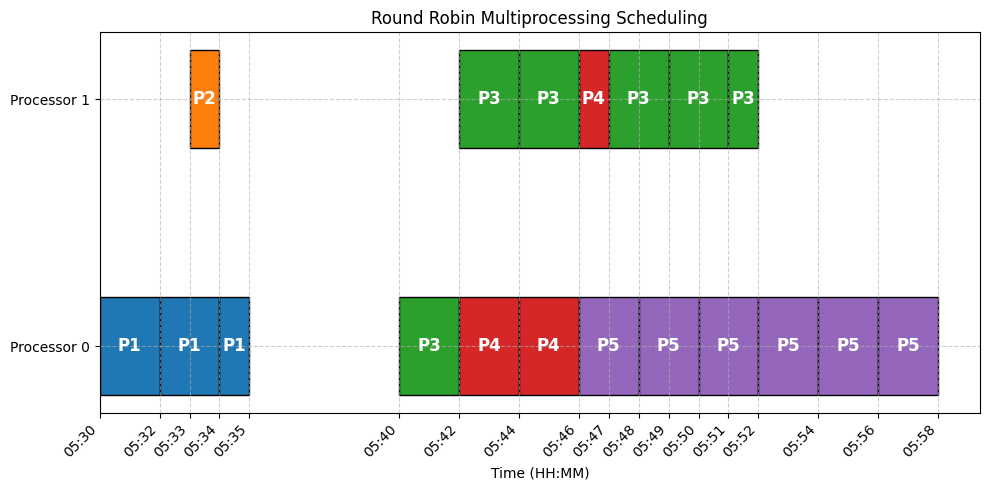

In [ ]:
def round_robin_multiprocessing_scheduling(processes, num_processors, time_slice):
    """
    Simulates a multiprocessor round robin scheduling.

    processes: List of tuples (Process ID, Arrival Time in HH:MM AM/PM, Burst Time in minutes)
    num_processors: Number of processors
    time_slice: Time slice (quantum) in minutes
    """
    # Convert and sort processes by arrival time.
    pending = sorted(
        [
            {
                "pid": pid,
                "arrival": convert_time_to_minutes(arrival),
                "remaining": burst,
            }
            for pid, arrival, burst in processes
        ],
        key=lambda x: x["arrival"],
    )
    ready_queue = deque()

    # Each processor is simulated independently.
    processors = [
        {
            "busy": False,
            "current_process": None,
            "scheduled_end": None,
            "slice_start": None,
        }
        for _ in range(num_processors)
    ]

    gantt_chart = []

    # Initialize current time to the first arrival (if any)
    current_time = pending[0]["arrival"] if pending else 0

    # Simulation loop: run until no pending processes, no ready processes, and all processors are idle.
    while pending or ready_queue or any(proc["busy"] for proc in processors):
        # If no processes are ready and all processors are idle, jump to the next arrival time.
        if (
            not ready_queue
            and not any(proc["busy"] for proc in processors)
            and pending
            and pending[0]["arrival"] > current_time
        ):
            current_time = pending[0]["arrival"]

        # Enqueue all processes that have arrived by current_time.
        while pending and pending[0]["arrival"] <= current_time:
            proc = pending.pop(0)
            ready_queue.append(proc)

        # Check each processor to see if it has finished its time slice.
        for i, proc_state in enumerate(processors):
            if proc_state["busy"] and proc_state["scheduled_end"] <= current_time:
                p = proc_state["current_process"]
                executed_time = current_time - proc_state["slice_start"]
                p["remaining"] -= executed_time
                # Record the execution segment in the gantt chart.
                gantt_chart.append(
                    (p["pid"], proc_state["slice_start"], current_time, i)
                )
                # Mark the processor as idle.
                proc_state["busy"] = False
                proc_state["current_process"] = None
                proc_state["scheduled_end"] = None
                proc_state["slice_start"] = None
                # If the process still needs CPU time, requeue it.
                if p["remaining"] > 0:
                    ready_queue.append(p)

        # Assign ready processes to any idle processor.
        for i, proc_state in enumerate(processors):
            if not proc_state["busy"] and ready_queue:
                p = ready_queue.popleft()
                slice_duration = min(time_slice, p["remaining"])
                proc_state["busy"] = True
                proc_state["current_process"] = p
                proc_state["slice_start"] = current_time
                proc_state["scheduled_end"] = current_time + slice_duration

        # Determine the next event time from:
        #   - The earliest processor finishing its time slice,
        #   - The next process arrival,
        #   - If none, simply advance time by 1 minute.
        event_candidates = []
        for proc_state in processors:
            if proc_state["busy"] and proc_state["scheduled_end"] > current_time:
                event_candidates.append(proc_state["scheduled_end"])
        if pending:
            event_candidates.append(pending[0]["arrival"])

        if event_candidates:
            next_time = min(event_candidates)
            if next_time == current_time:
                current_time += 1
            else:
                current_time = next_time
        else:
            # No upcoming events, so exit the simulation.
            break

    return gantt_chart


# Example usage:
n_processors = 2
time_quantum = 2
gantt_chart = round_robin_multiprocessing_scheduling(
    processes, n_processors, time_quantum
)
print_gantt_chart(gantt_chart)
plot_gantt_chart(gantt_chart, title="Round Robin Multiprocessing Scheduling")